<a href="https://colab.research.google.com/github/aminadli/Walmart-Sales/blob/main/Walmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
!pip install calendar
import calendar

Pre-processing

In [24]:
data=pd.read_csv("https://raw.githubusercontent.com/aminadli/Walmart-Sales/main/Walmart_sales.csv")






In [27]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [28]:

data.duplicated().sum()

0

In [35]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [36]:
pd.options.display.float_format='{:,.0f}'.format

In [37]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [38]:
data.columns = data.columns.str.lower()

In [39]:
data.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [40]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Exploitory Data Analysis(EDA)

univariate analysis

In [6]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [42]:
data[[ 'weekly_sales', 'temperature','fuel_price', 'cpi', 'unemployment']].describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,172,8
std,"564,367",18,0,39,2
min,"209,986",-2,2,126,4
25%,"553,350",47,3,132,7
50%,"960,746",63,3,183,8
75%,"1,420,159",75,4,213,9
max,"3,818,686",100,4,227,14


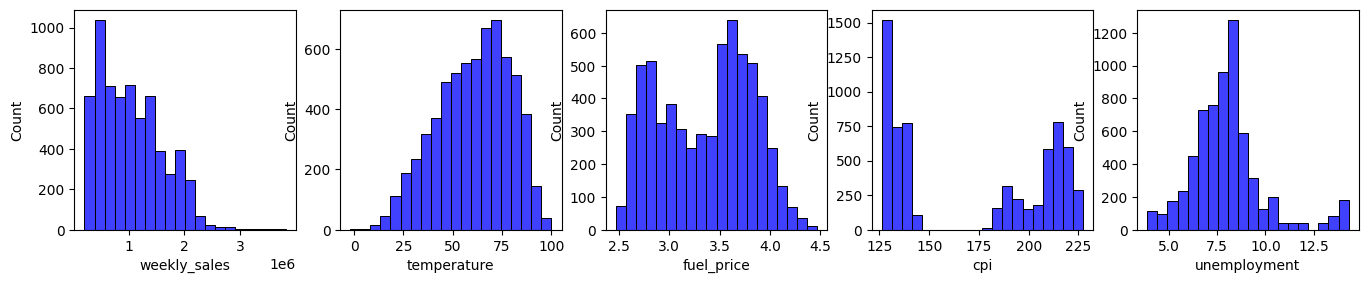

In [43]:
columns = ['weekly_sales', 'temperature','fuel_price', 'cpi', 'unemployment']


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))

for i, col in enumerate(columns):
    plt.subplot(6,6,i+1)
    sns.histplot(data = data , x=col , bins =20, color= "blue")
plt.show()

Bi - Variate Analysis

Average sales on holiday vs regular days?

In [44]:
data.groupby('holiday_flag')['weekly_sales'].mean()

holiday_flag
0   1,041,256
1   1,122,888
Name: weekly_sales, dtype: float64

<ipython-input-49-2166ffa02a3e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data,
<ipython-input-49-2166ffa02a3e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data,


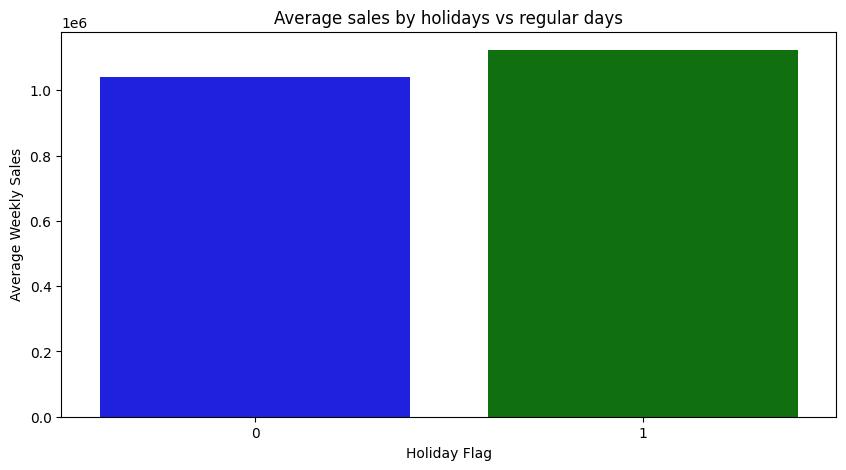

In [49]:
plt.figure(figsize = (10, 5))

colors = ['blue', 'green']

sns.barplot(data = data,
           x = 'holiday_flag',
           y = 'weekly_sales',
           estimator = np.mean,
           ci = False,
            palette=colors)



plt.title('Average sales by holidays vs regular days')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

In [50]:
data.groupby('holiday_flag')['weekly_sales'].sum()

holiday_flag
0   6,231,919,436
1     505,299,552
Name: weekly_sales, dtype: float64

<ipython-input-51-dde1fc6d23cd>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data,
<ipython-input-51-dde1fc6d23cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data,


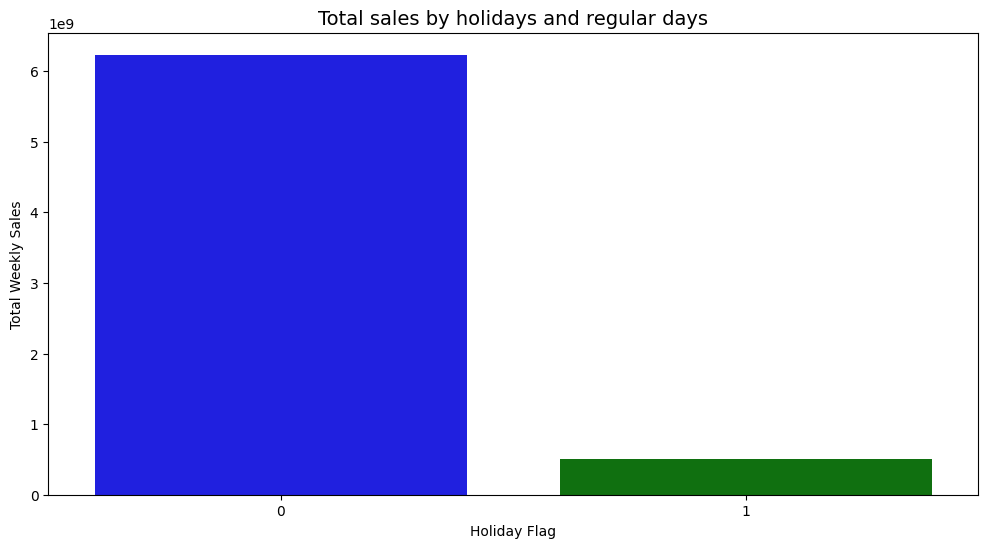

In [51]:
plt.figure(figsize = (12, 6))

colors = ['blue', 'green']

sns.barplot(data = data,
           x = 'holiday_flag',
           y = 'weekly_sales',
           estimator = np.sum,
           ci = False,
            palette=colors)

plt.title('Total sales by holidays and regular days', size = 14)
plt.xlabel('Holiday Flag', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

Best branch

In [ ]:
best_branch =  data.groupby('store')['weekly_sales'].sum().sort_values(ascending = False)
best_branch

<ipython-input-57-7f82982a1d15>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma', len(best_branch))
<ipython-input-57-7f82982a1d15>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data,
<ipython-input-57-7f82982a1d15>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data,


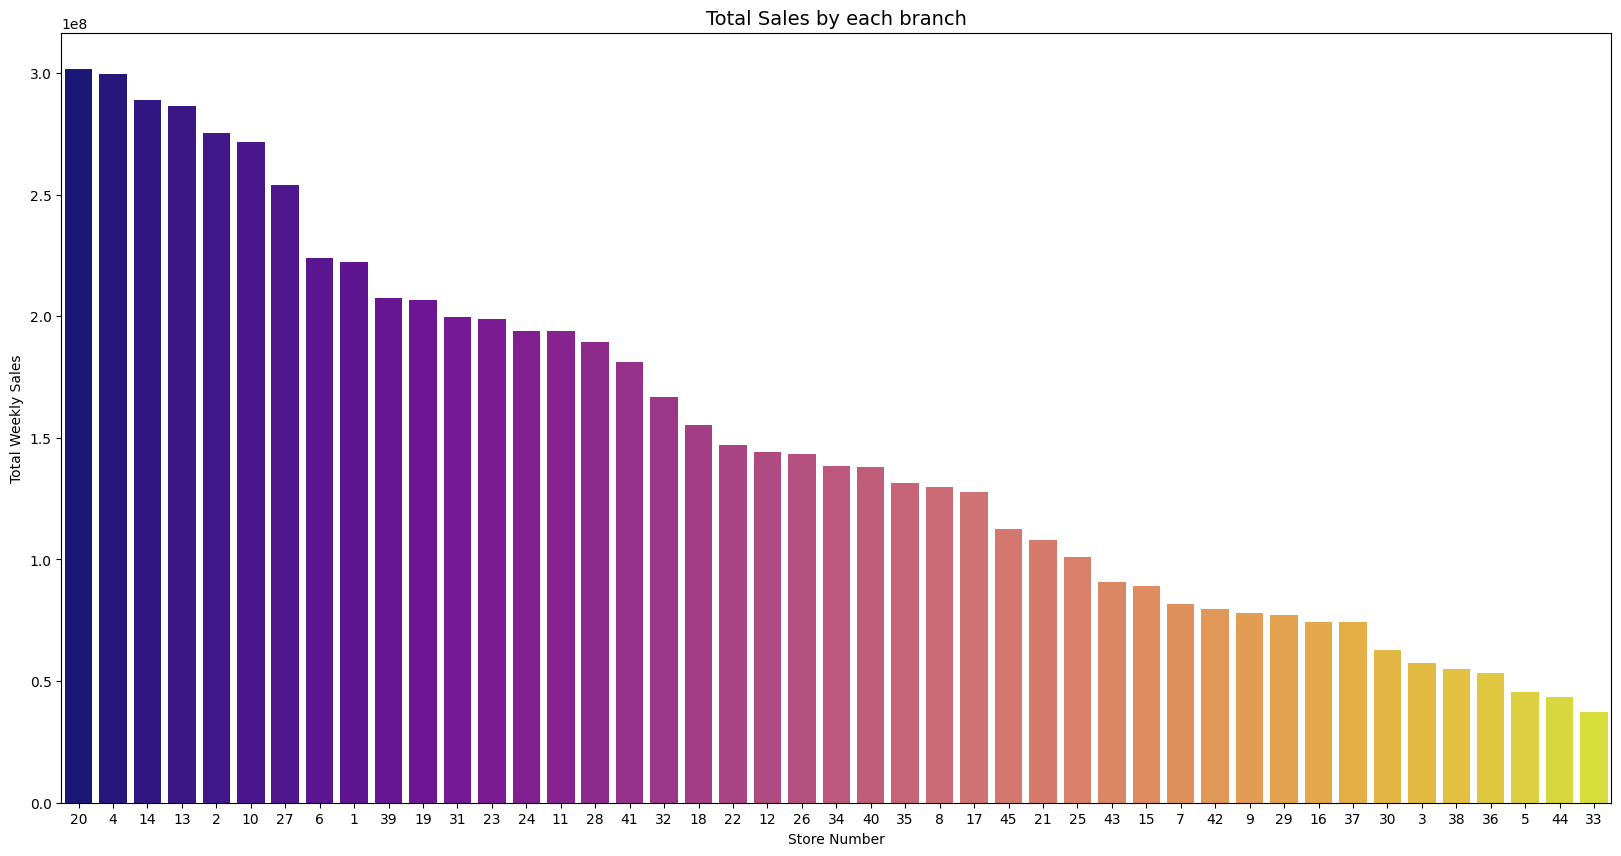

In [57]:
plt.figure(figsize = (20, 10))

cmap = plt.cm.get_cmap('plasma', len(best_branch))
reversed_cmap = cmap.reversed()

sns.barplot(data = data,
           x = 'store',
           y = 'weekly_sales',
           order = best_branch.index,
           estimator = np.sum,
           ci = False,
            palette=[cmap(i) for i in range(len(best_branch))])

plt.title('Total Sales by each branch', size = 14)
plt.xlabel('Store Number', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

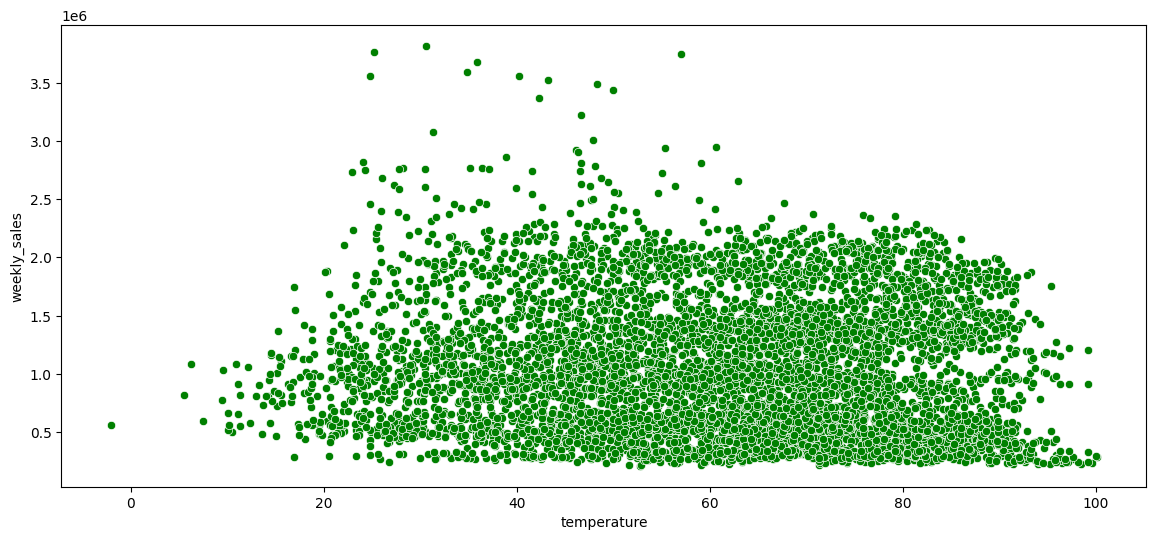

In [65]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'temperature',
           y = 'weekly_sales',
           color = 'green',
                edgecolor = 'white')
plt.show()

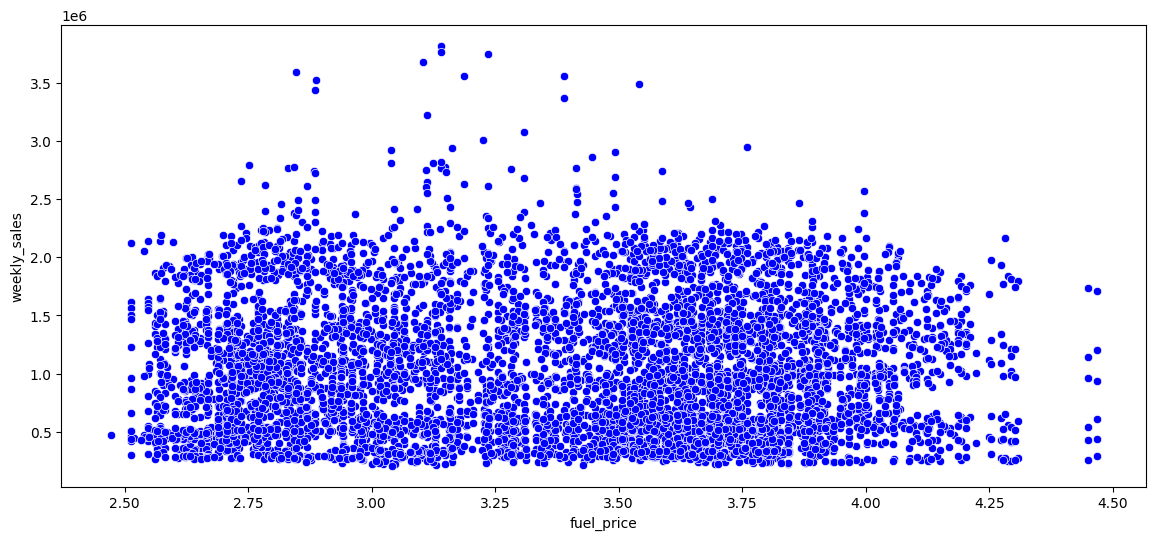

In [67]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'fuel_price',
           y = 'weekly_sales',
           color = 'blue',
                edgecolor = 'white')
plt.show()

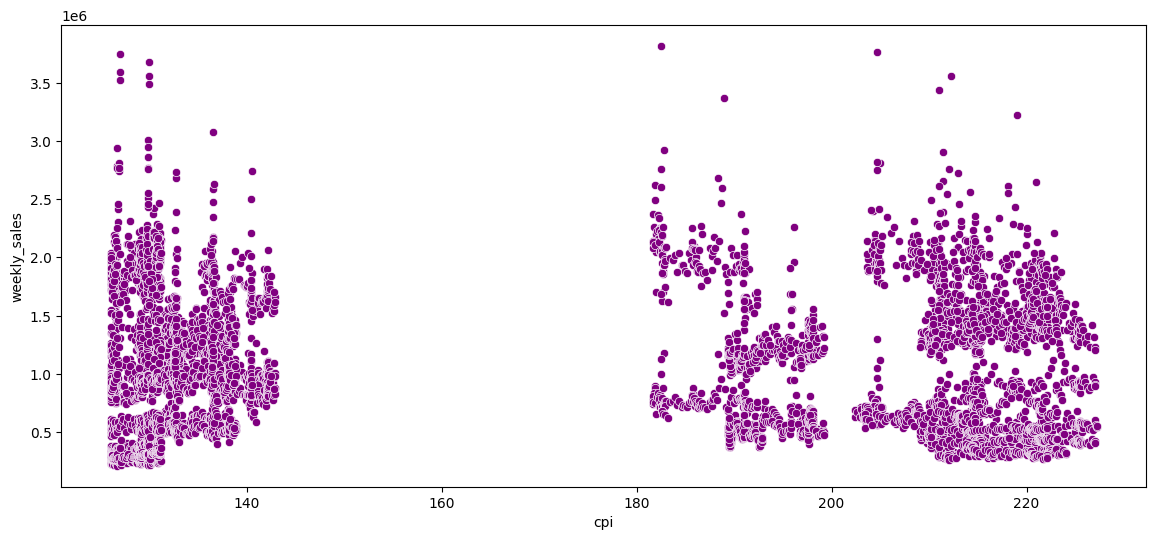

In [68]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'cpi',
           y = 'weekly_sales',
           color = 'purple',
                edgecolor = 'white')
plt.show()

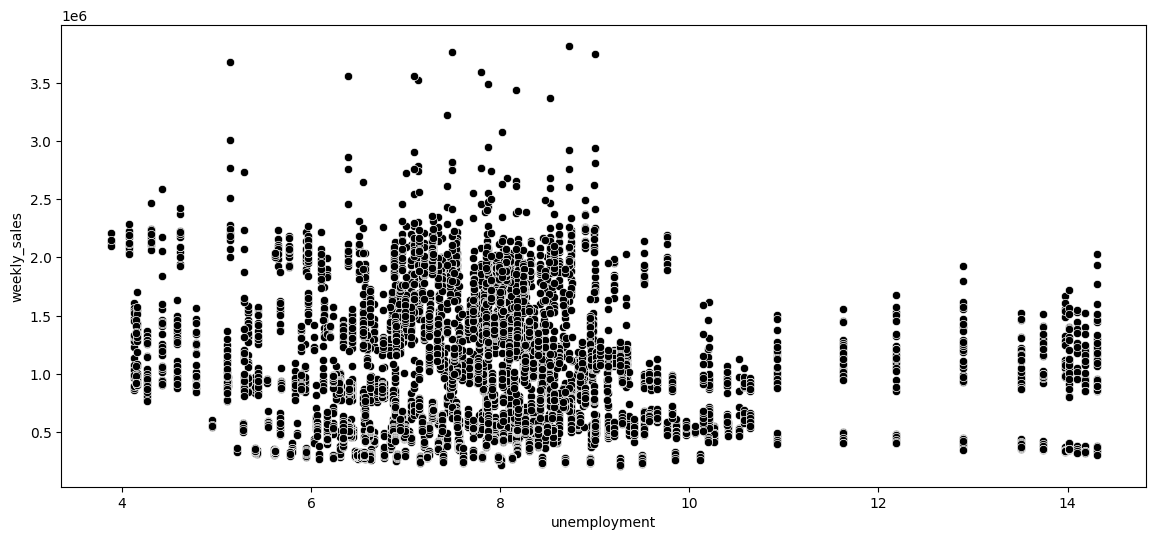

In [70]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'unemployment',
           y = 'weekly_sales',
           color = 'black',
                edgecolor = 'white')
plt.show()

**Conclusion**

Store number 20 takes the first place by total weekly sales

Sales are not affected by temperature

Sales are not affected by fuel price

Sales are affected by cpi

Sales are affected by unemployment.Sales are decrising while unemployment in increasing